#Defining the Question
**a) Specifying the Question**

> Predicting what type of sentiments will be expressed depending on the type of tweet written and location of the the account  



**b) Defining the Metric for Success**



> Find the best model to best predict the sentiments expressed over a tweet 



**c) Understanding the context**
 



> Social media has become a huge part of our life. It connects people to the outer world. Social media provides a way to showcase our lives, discretely, conveniently and on our own terms. People rely more on the posts and tweets shared on the social networking sites like Twitter®, Facebook®, and Instagram®. It is anticipated that social media should guide people in getting correct and authentic information on Corona cases.


>  There are various classification models used in machine learning. Depending on the features , accuracy and MSE, a good  model should be choosen, so it is easier to predict the sentiments that will be  expressed before the tweet is written and posted 



**d) Recording the Experimental Design**

 Importing Libraries

 Data cleaning and manipulaion 

 Exploratory Data Analysis 

 Preprocessing

 Modelling

 Challenge the solution  
 

Follow-up questions


**e) Data Relevance**

The datasets used in this analysis were obtained from kaggle website. They comprise of 2 datasets namely;  test and train 



# Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns


import numpy as np 
import pandas as pd

import datetime as dt

# Data Understanding

In [ ]:
# loading the dataset
data = pd.read_csv("/content/tweet_train.csv", encoding="latin1")
test=pd.read_csv("/content/tweet_test (1).csv", encoding="latin1")


In [ ]:
## viewing the dataset
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# checking the bottom of the dataset
data.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
### the shape of the data
data.shape

(41157, 6)

In [ ]:
## data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


# Data Cleaning and Manipulation

**Duplicated entries**

In [ ]:
# check for duplicates
data.duplicated().any()

# no duplicates found

False

**Missing values**

In [ ]:
### missing values
data.isnull().sum()

# location has missing data

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
data['Location'].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [ ]:
### replacing NaN with unknown location
data['Location']=data['Location'].replace(np.nan,'unknown')
data['Location'].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

**More data cleaning procedures**

In [ ]:
#changing the date to datetime
data['TweetAt'] = pd.to_datetime(data['TweetAt'])

In [ ]:
# Create features for year, month, day
data['year'] = data['TweetAt'].dt.year 
data['month'] = data['TweetAt'].dt.month 
data['day'] = data['TweetAt'].dt.day 


In [ ]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,year,month,day
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2020,3,16
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,2020,3,16
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,2020,3,16
3,3802,48754,unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,2020,3,16
4,3803,48755,unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,2020,3,16


In [ ]:
#dropping columns that we do not need
data = data.drop(["TweetAt", "year"], 1) #the year column has same value(2020)

print(data.columns)

Index(['UserName', 'ScreenName', 'Location', 'OriginalTweet', 'Sentiment',
       'month', 'day'],
      dtype='object')


**Reducing the sentiments to only 3 values**

In [ ]:
# checking the distribution of the sentiment column
data['Sentiment'].value_counts()



Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

>There is not a huge imbalance between the different classes. 

**Exporting the cleaned dataset**

In [ ]:
cleaned = data.to_csv("cleaned.csv")

# Exploratory EDA

## **Count Plot of the sentiment classes**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

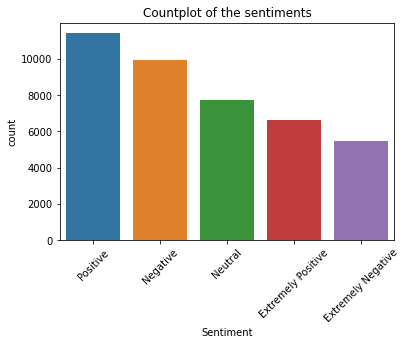

In [ ]:
# Count plot of sentiments
sns.countplot(data['Sentiment'], order = data['Sentiment'].value_counts().index)
plt.title("Countplot of the sentiments")
plt.xticks(rotation=45)

We can also combine the Extreme positive to Positive sentiments and Extreme negative to Negative sentiments as they are more likely to have similar information in them.

>It will also make it easier to visualize 

In [ ]:
# function to make the changes on the sentiment column
def classes_def(x):
    if x ==  "Extremely Positive":
        return "Positive"
    elif x == "Extremely Negative":
        return "Negative"
    elif x == "Negative":
        return "Negative"
    elif x ==  "Positive":
        return "Positive"
    else:
        return "Neutral"
    
data['Sentiment']=data['Sentiment'].apply(lambda x:classes_def(x))
# train['sentiment']=train['Sentiment'].apply(lambda x:classes_def(x))
# test['sentiment']=test['Sentiment'].apply(lambda x:classes_def(x))
target=data['Sentiment']

data.Sentiment.value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

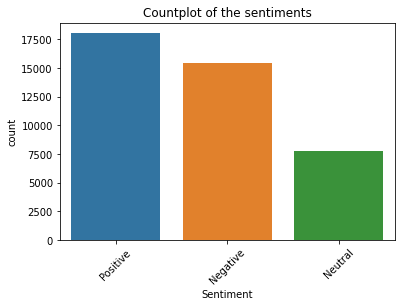

In [ ]:
# Count plot of sentiments
sns.countplot(data['Sentiment'], order = data['Sentiment'].value_counts().index)
plt.title("Countplot of the sentiments")
plt.xticks(rotation=45)

In [ ]:
# We will copy the text in another column so that the original text is also there for comparison

data['text'] = data.OriginalTweet
data["text"] = data["text"].astype(str)

data.head()

,UserName,ScreenName,Location,OriginalTweet,Sentiment,month,day,text
0,3799,48751,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,3,16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,advice Talk to your neighbours family to excha...,Positive,3,16,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,3,16,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,unknown,My food stock is not the only one which is emp...,Positive,3,16,My food stock is not the only one which is emp...
4,3803,48755,unknown,"Me, ready to go at supermarket during the #COV...",Negative,3,16,"Me, ready to go at supermarket during the #COV..."


## **Number of characters in a tweet per sentiment**

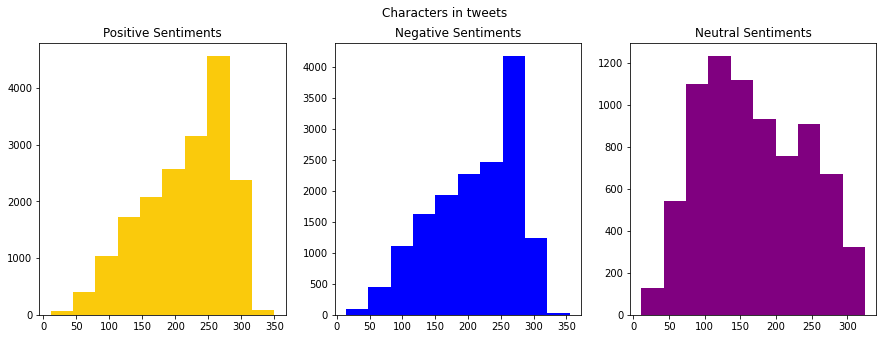

In [ ]:
# defining the number of plots to make and figure size
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

# number of characters in the positive sentiments
tweet_len_positive=data[data['Sentiment']=="Positive"]['text'].str.len()
ax1.hist(tweet_len_positive,color='#FACA0C')
ax1.set_title('Positive Sentiments')

# number of characters in the negative sentiments
tweet_len_negative=data[data['Sentiment']=="Negative"]['text'].str.len()
ax2.hist(tweet_len_negative,color='blue')
ax2.set_title('Negative Sentiments')

# number of characters in the neutral sentiments
tweet_len_neutral=data[data['Sentiment']=="Neutral"]['text'].str.len()
ax3.hist(tweet_len_neutral,color='purple')
ax3.set_title('Neutral Sentiments')



fig.suptitle('Characters in tweets')
plt.show()

## **Number of words per tweets**

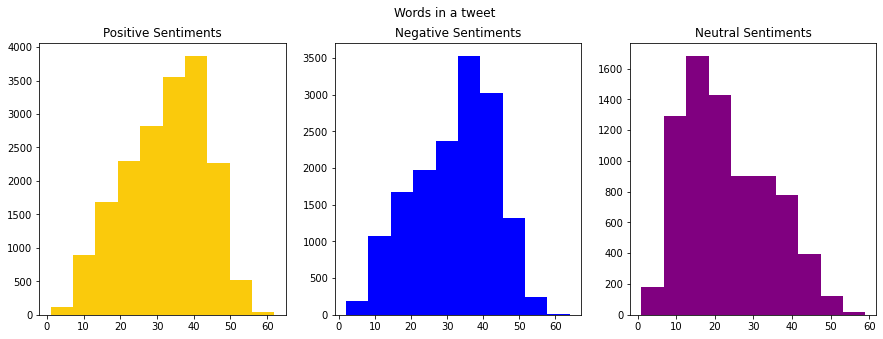

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

tweet_len_positive=data[data['Sentiment']=="Positive"]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len_positive,color='#FACA0C')
ax1.set_title('Positive Sentiments')

tweet_len_negative=data[data['Sentiment']=="Negative"]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len_negative,color='blue')
ax2.set_title('Negative Sentiments')

tweet_len_neutral=data[data['Sentiment']=="Neutral"]['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len_neutral,color='purple')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Words in a tweet')
plt.show()

## **Stop words**

In [ ]:
# function to check for stop words in each sentiment group
def create_corpus(target):
  corpus=[]
  
  for x in data[data['Sentiment']==target ]['text'].str.split():
    for i in x:
      corpus.append(i)
  
  return corpus

# calling the function
# create_corpus("Neutral")

# # for the neutral group, stop words are many considering the huge size of data. 
# # They need to be removed during preprocessing

In [ ]:
# # target = data[(data["Sentiment"] =="Extremely Positive")] #"Extremely Positive", "Positive", "Negative", "Neutral"]]
# # for i in target:
# stop = []
# s = create_corpus("Extremely Positive")
# stop.append(s)

# stop

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords') 
set(stopwords.words('english'))

# initialize a variable to contain stopwords in English
stop_words = set(stopwords.words('english')) 

# tokens of words 
word_tokens = data['text'].apply(nltk.word_tokenize) 
# word_tokens = word_tokenize(data['text']) 
    
stop = [] 
  
for w in word_tokens: 
  for w in stop_words: 
    stop.append(w) 


# check the stop words 
stop

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['on',
 'out',
 'ourselves',
 'was',
 'won',
 'yourselves',
 'my',
 'of',
 'this',
 'own',
 'it',
 'shan',
 'our',
 'him',
 'should',
 'they',
 'what',
 've',
 'for',
 'once',
 'not',
 "wasn't",
 'against',
 'until',
 'as',
 'now',
 'under',
 'd',
 "shan't",
 'mustn',
 'she',
 'herself',
 "should've",
 "you'll",
 'couldn',
 'mightn',
 'most',
 'wouldn',
 "you'd",
 'have',
 'myself',
 'its',
 'shouldn',
 'his',
 'am',
 'then',
 'other',
 'haven',
 'at',
 "aren't",
 'same',
 'your',
 'why',
 'are',
 'he',
 'ma',
 'them',
 'wasn',
 "mustn't",
 'you',
 'm',
 'itself',
 'off',
 'these',
 'very',
 "you're",
 'such',
 'with',
 'their',
 'don',
 "hasn't",
 'we',
 'how',
 "didn't",
 'to',
 're',
 'some',
 'during',
 'here',
 'be',
 'a',
 'over',
 'than',
 'isn',
 "haven't",
 'through',
 'were',
 'doing',
 'can',
 'no',
 "couldn't",
 'down',
 "wouldn't",
 'me',
 "doesn't",
 'being',
 'there',
 'which',
 'ain',
 'just',
 'ours',
 'but',
 'yours',
 'so',
 'aren',
 'didn',
 "that'll",
 'an',
 'any'

**Punctuations**

In [ ]:
from collections import defaultdict, Counter
# corpus=create_corpus("positive")

# dic=defaultdict(int)
# for word in corpus:
#     if word in stop:
#         dic[word]+=1     
        
# top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
# x,y=zip(*top)
# plt.bar(x,y, color='#17C37B')

## **Common words**

<font color='blue'>Positive sentiments

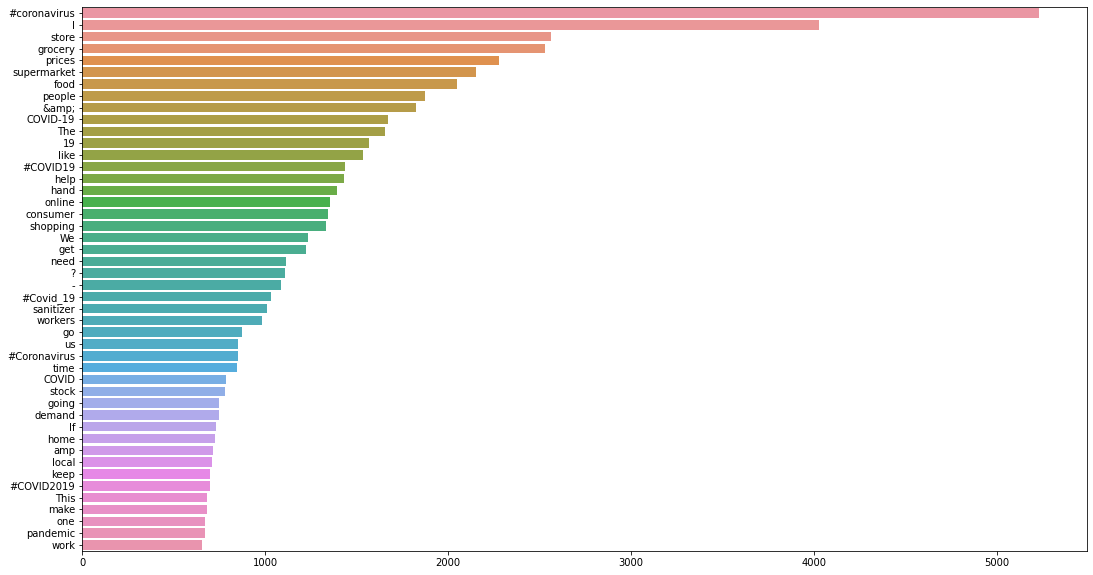

In [ ]:

# checking for common words in the class "Positive"
corpus=create_corpus("Positive")
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
# for loop to append the word and count for most common words to empty lists
for word,count in most[:100]:
  # do not include stop words
  if (word not in stop) :
    x.append(word)
    y.append(count)

# plotting
plt.figure(figsize=(18,10))
sns.barplot(x=y,y=x)

<font color='blue'>Negative sentiments

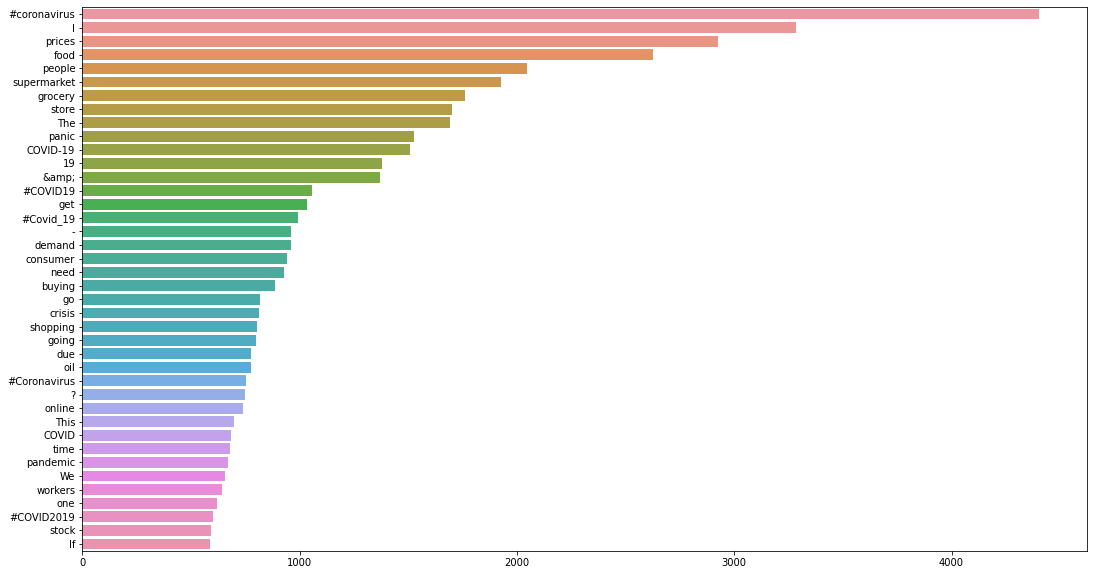

In [ ]:
# checking for common words in the class "Negative"
corpus=create_corpus("Negative")
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
# for loop to append the word and count for most common words to empty lists
for word,count in most[:100]:
  # do not include stop words
  if (word not in stop) :
    x.append(word)
    y.append(count)

# plotting
plt.figure(figsize=(18,10))
sns.barplot(x=y,y=x)

<font color='blue'>Neutral sentiments

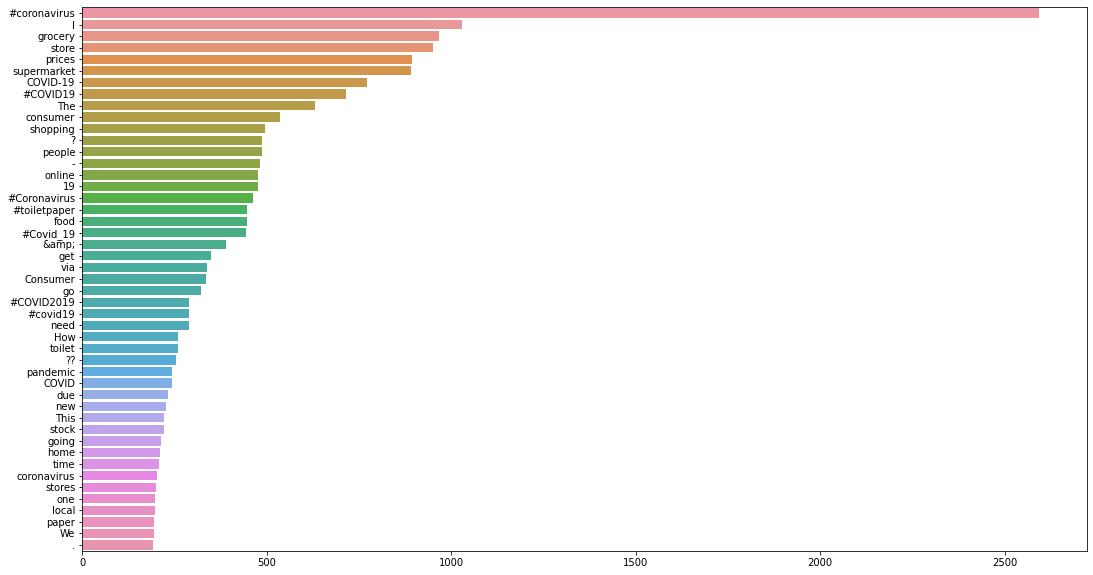

In [ ]:
# checking for common words in the class "Neutral"
corpus=create_corpus("Neutral")
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
# for loop to append the word and count for most common words to empty lists
for word,count in most[:100]:
  # do not include stop words
  if (word not in stop) :
    x.append(word)
    y.append(count)

# plotting
plt.figure(figsize=(18,10))
sns.barplot(x=y,y=x)

## **Most polular Hashtags for the period**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text major ticklabel objects>)

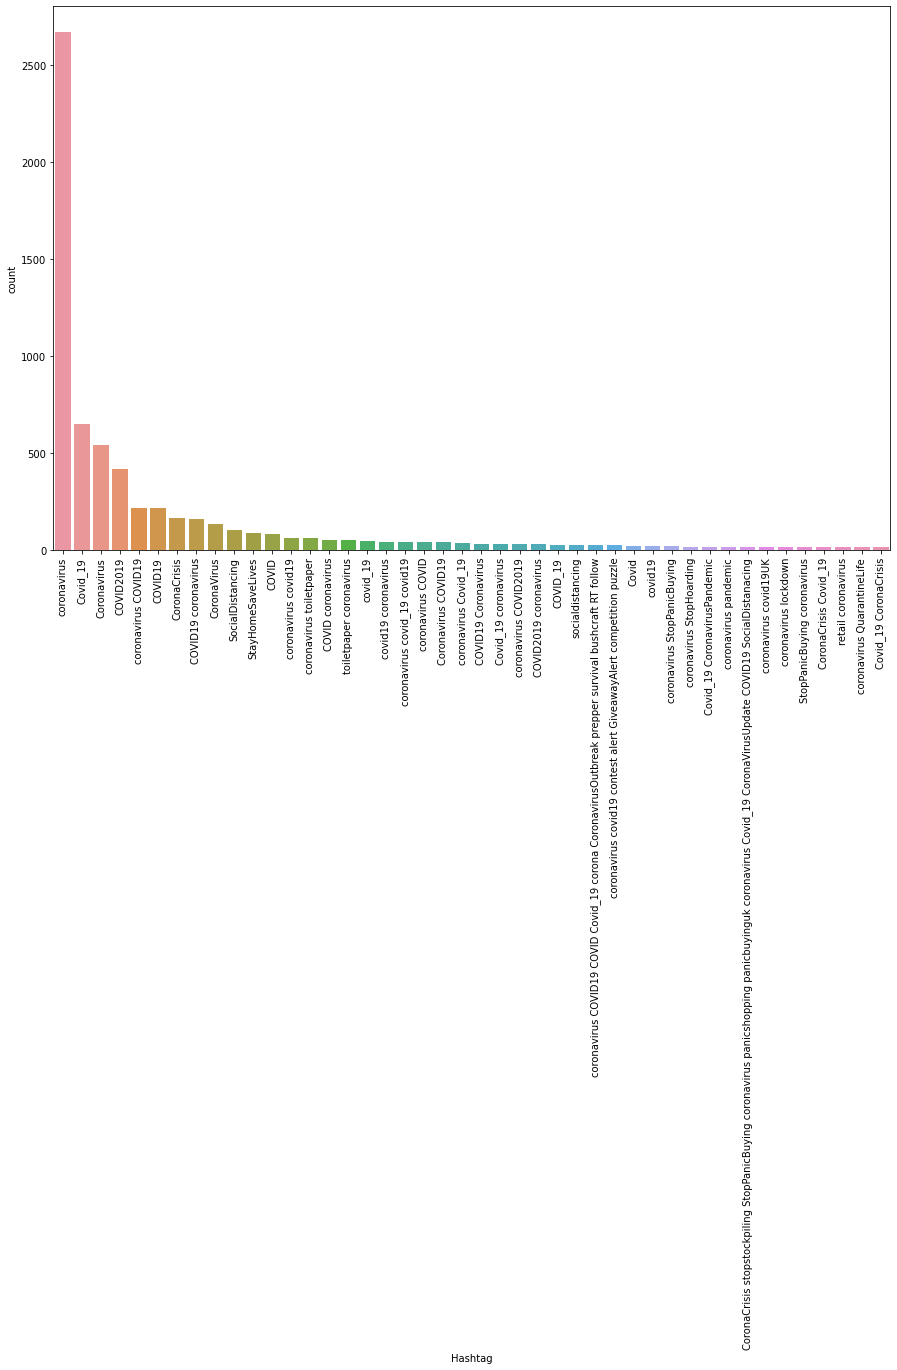

In [ ]:
# import regular expression function
import re 

# function to find hashtags in the text
def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)

# apply the function to the text
data['hash']=data['text'].apply(lambda x:find_hash(x))

# create a temporary dataframe that contains the value counts for the top 45 most popular hashtags
temp1=data['hash'].value_counts()[:][1:45]
temp1= temp1.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})

# make a plot of the popular hashtags
plt.figure(figsize=(15,10))
sns.barplot(x="Hashtag",y="count", data = temp1)
plt.xticks(rotation=90)

## **Most popular mentions**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]), <a list of 69 Text major ticklabel objects>)

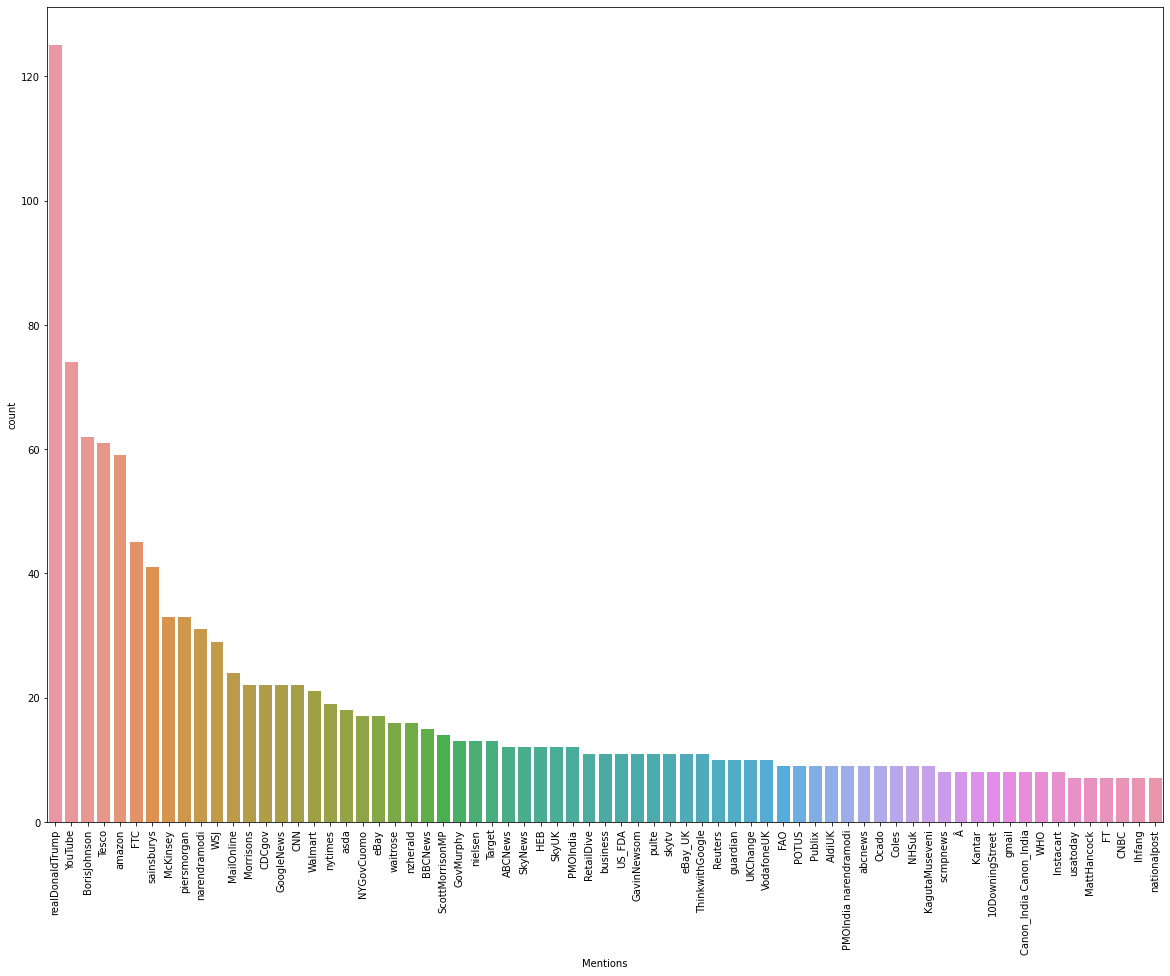

In [ ]:
# function to find mentions(@) in the text
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)

 # apply the function to the text   
data['mentions']=data['text'].apply(lambda x:mentions(x))

# create a temporary dataframe that contains the value counts for the top 70 most popular mentions
temp2=data['mentions'].value_counts()[:][1:70]
temp2 =temp2.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

# make a plot of the popular hashtags
plt.figure(figsize=(20,15))
sns.barplot(x="Mentions",y="count", data = temp2)
plt.xticks(rotation=90)


In [ ]:
# create a temporary dataframe that contains the hashtags 
temp_hash=data['hash'].value_counts()
temp_hash= temp_hash.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count', 'location':'location'})

# create a temporary dataframe that contains the mentions 
temp_men=data['mentions'].value_counts()
temp_men=temp_men.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count', 'location':'location'})

# export the dataframes as csv files for use to plot on tableau
hashtags = temp_hash.to_csv("h#shtags.csv")
mentions = temp_men.to_csv("m@ntions.csv")



## **Word Clouds for each Sentiment**

<font color='blue'>Positive sentiments

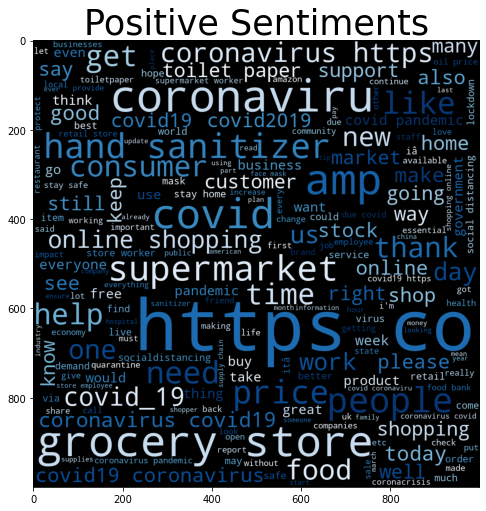

In [ ]:
from wordcloud import WordCloud 
data_pos = data[data["Sentiment"]=="Positive"]
data_neg = data[data["Sentiment"]=="Negative"]
data_neu = data[data["Sentiment"]=="Neutral"]

comment_words = '' 
stopwords = set(stop_words) 

for val in data_pos.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud1 = WordCloud(width = 1000, height = 1000, 
                background_color ='black',
                colormap="Blues",
                stopwords = stopwords, 
                min_font_size = 15).generate(comment_words) 
plt.figure(figsize=(8,10))
ax1 = plt.imshow(wordcloud1)
# ax1.axis('off')
plt.title('Positive Sentiments',fontsize=35);

<font color='blue'>Negative sentiments

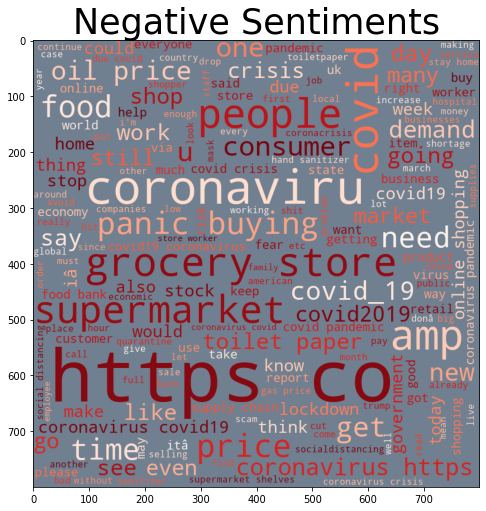

In [ ]:
comment_words = ''

for val in data_neg.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='slategrey',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 15).generate(comment_words)  
plt.figure(figsize=(8,10))
ax2=plt.imshow(wordcloud2)
# ax2.axis('off')
plt.title('Negative Sentiments',fontsize=35);


<font color='blue'>Neutral sentiments

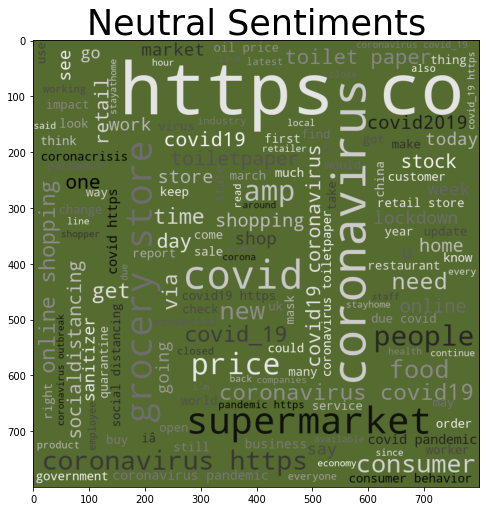

In [ ]:
comment_words = ''
for val in data_neu.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='darkolivegreen',
                colormap="Greys",
                stopwords = stopwords, 
                min_font_size = 15).generate(comment_words) 
plt.figure(figsize=(8,10))
ax3 = plt.imshow(wordcloud3)
# ax3.axis('off')
plt.title('Neutral Sentiments',fontsize=35);

# **Pre-processing**

In [ ]:
# make all characters lowercase
# data['OriginalTweet'] = data.OriginalTweet.map(lambda x: x.lower())

In [ ]:
import re
import nltk
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()


def cleaner(orig_tweet):
    # remove urls/links
    orig_tweet = re.sub(r'http\S+', ' ', orig_tweet)
    
    # remove html tags
    orig_tweet = re.sub(r'<.*?>',' ', orig_tweet)
    
    # remove digits
    orig_tweet = re.sub(r'\d+',' ', orig_tweet)

    # remove hashtags
    orig_tweet = re.sub(r'#\w+',' ', orig_tweet)
    
    # remove mentions
    orig_tweet = re.sub(r'@\w+',' ', orig_tweet)

    # Removing any punctuation
    orig_tweet = re.sub(r'[^\w\s]', '', orig_tweet)

     # converting all characters to lowercase
    orig_tweet = str(orig_tweet).lower()

    # tokenization
    orig_tweet = word_tokenize(orig_tweet)
    
    #removing stop words
    orig_tweet = [word for word in orig_tweet if word not in stop_words]
    
    # lemmatization
    orig_tweet = [lemma.lemmatize(word=w, pos='v') for w in orig_tweet]

    # remove words with length <=2
    orig_tweet = [i for i in orig_tweet if len(i) > 2]

    return orig_tweet


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# apply the function to the text column for easy comparison with the original tweet
data['text'] = data['text'].apply(cleaner)

In [ ]:
# check the dataframe to see changes made
data.sample(10)

,UserName,ScreenName,Location,OriginalTweet,Sentiment,month,day,text,hash,mentions
27291,31090,76042,"Newport Beach, Califonia",One complaint targets hand sanitizer manufactu...,Positive,3,4,"[one, complaint, target, hand, sanitizer, manu...",,
6107,9906,54858,New York City area,It was a pleasure to be part of such a timely ...,Positive,3,19,"[pleasure, part, timely, insightful, conversat...",,nikkibaird jtenser
24679,28478,73430,"York, England",Residents hit hard by the pandemic can get hel...,Positive,3,27,"[residents, hit, hard, pandemic, get, help, fo...",,
38030,41829,86781,unknown,"My Life In 2020: #QuarantineDiaries, https://t...",Positive,11,4,"[life, via, need, giftor, write, thoughtsmy, l...",QuarantineDiaries QuarantineDiaries Quarantine...,amazon
37479,41278,86230,"Abuja, Nigeria",Governors of the 36 states under the aegis of ...,Neutral,10,4,"[governors, state, aegis, nigeria, governors, ...",,
16151,19950,64902,unknown,So I'm at home video calling my mam on #mother...,Negative,3,22,"[home, video, call, mam, believe, challenge, y...",mothersday2020 COVIDIOT coronavirus,
8448,12247,57199,United Kingdom,Anyone else so ashamed of being British right ...,Negative,3,19,"[anyone, else, ashamed, british, right, people...",lockdownuk coronavirus,
27810,31609,76561,"London, England",Keep staff &amp; customers safe and happy... m...,Positive,3,4,"[keep, staff, amp, customers, safe, happy, mas...",coronavirus covid supermarket conveniencestore...,bigbrightideasgroup
28234,32033,76985,Panama,In Desperation New York State Pays Up to 15 Ti...,Negative,4,4,"[desperation, new, york, state, pay, time, nor...",,
20787,24586,69538,"Barcelona, Spain",The crisis of #covid_19 is causing drops in de...,Negative,3,25,"[crisis, cause, drop, demand, price, european,...",covid_19 ElectricityMarkets BrentOil TTF CO2 c...,


In [ ]:
# Finally, we will transform the data into occurrences, 
# 
from sklearn.feature_extraction.text import CountVectorizer

# This converts the list of words into space-separated strings
data['text'] = data['text'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts = count_vect.fit_transform(data['text'])

In [ ]:
# We could leave it as the simple word-count per message, but it is better to use Term Frequency Inverse Document Frequency, more known as tf-idf
# 
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)

In [ ]:
# selecting features and labels
# X = data['OriginalTweet']
# y = data['Sentiment']

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_cleaned)

# X = tokenizer.texts_to_sequences(X_cleaned)

# vocab_size = len(tokenizer.word_index)+1

# print("Vocabulary size: {}".format(vocab_size))
# print("\nExample:\n")
# print("Sentence:\n{}".format(X_cleaned[10]))
# print("\nAfter tokenizing :\n{}".format(X[10]))

# X = pad_sequences(X, padding='post')
# print("\nAfter padding :\n{}".format(X[10]))

# **Modelling**

## Naive Bayes Model

In [ ]:
from sklearn.model_selection import train_test_split

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(counts, data['Sentiment'], test_size=0.2, random_state=69)

from sklearn.naive_bayes import MultinomialNB

# modelling using the Multinomial Naive Bayes model
model = MultinomialNB().fit(X_train, y_train)

# predicting using test set
predicted = model.predict(X_test)
print(np.mean(predicted == y_test)) #getting accuracy of the model

0.657069970845481


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=200,  random_state=69)
random.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=69, verbose=0,
                       warm_start=False)

In [ ]:
# Prediction 
y_pred = random.predict(X_test)

# Evaluation of the model
print(confusion_matrix(y_test,y_pred))

print('-----------------------------------------')

print(classification_report(y_test,y_pred))

SVM

In [ ]:
# # Building the model 
# from sklearn.svm import SVC
# rbf = SVC(kernel='rbf', gamma=4, C=10)
# # Training the model using the training set
# rbf.fit(X_train, y_train)

In [ ]:
# # Prediction 
# y_pred = rbf.predict(X_test)

# # Evaluation of the model
# print(confusion_matrix(y_test,y_pred))

# print('-----------------------------------------')

# print(classification_report(y_test,y_pred))

##Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(X_train, y_train)

In [ ]:
# Prediction 
y_pred = logit.predict(X_test)

# Evaluation of the model
print(confusion_matrix(y_test,y_pred))

print('-----------------------------------------')

print(classification_report(y_test,y_pred))

##Bernoulli

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(binarize = 0.1)


model = clf.fit(X_train, y_train)
model.score(X_train, y_train)

0.8191343963553531

## Neural Networks

In [ ]:
##Importing libraries

# Import an Multi-Layer Perceptron Classifier model estimator from Scikit-Learn's neural_network library
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix




In [ ]:
##Training our model
# Creating our model
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='logistic', random_state=10, max_iter=300, solver='adam', learning_rate_init=0.03)

# fitting the data
mlp.fit(X_train,y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.03, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Prediction 
y_pred = mlp.predict(X_test)

# Evaluation of the model
print(confusion_matrix(y_test,y_pred))

print('-----------------------------------------')

print(classification_report(y_test,y_pred))
##solver- 77%
##logistic -78%
##logistic with learning_rate=0.003=79%

[[2380  275  331]
 [ 207 1126  212]
 [ 419  270 3012]]
-----------------------------------------
              precision    recall  f1-score   support

    Negative       0.79      0.80      0.79      2986
     Neutral       0.67      0.73      0.70      1545
    Positive       0.85      0.81      0.83      3701

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.77      8232
weighted avg       0.79      0.79      0.79      8232



The best model for predicting sentiments according to their accuracy is Bernoulli with an accuracy of 
81.9% 

##Challenging the solution 

TensorFlow

In [ ]:
import re
import nltk
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()


def cleaner(orig_tweet):
    # remove urls/links
    orig_tweet = re.sub(r'http\S+', ' ', orig_tweet)
    
    # remove html tags
    orig_tweet = re.sub(r'<.*?>',' ', orig_tweet)
    
    # remove digits
    orig_tweet = re.sub(r'\d+',' ', orig_tweet)

    # remove hashtags
    orig_tweet = re.sub(r'#\w+',' ', orig_tweet)
    
    # remove mentions
    orig_tweet = re.sub(r'@\w+',' ', orig_tweet)

    # Removing any punctuation
    orig_tweet = re.sub(r'[^\w\s]', '', orig_tweet)

     # converting all characters to lowercase
    orig_tweet = str(orig_tweet).lower()

    # tokenization
   # orig_tweet = word_tokenize(orig_tweet)
    
    #removing stop words
    orig_tweet = [word for word in orig_tweet if word not in stop_words]
    
    # lemmatization
    orig_tweet = [lemma.lemmatize(word=w, pos='v') for w in orig_tweet]

    # remove words with length <=2
    orig_tweet = [i for i in orig_tweet if len(i) > 2]

    return orig_tweet


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

X_features = data['text'].copy()
X_cleaned=X_features.apply(cleaner)
tk = Tokenizer()
tk.fit_on_texts(X_cleaned)
X = tk.texts_to_sequences(X_cleaned)
X = pad_sequences(X, padding="post")

In [ ]:

vocab_size = len(tk.word_index)+1
tf.keras.backend.clear_session()
# hyper parameters
EPOCHS = 2
BATCH_SIZE = 32
embedding_dim = 16
units = 256

model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(units,return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64, activation="relu"),
    L.Dropout(0.4),
    L.Dense(3)
])
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          16        
_________________________________________________________________
bidirectional (Bidirectional (None, None, 512)         559104    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [ ]:
X_test = test['OriginalTweet']
test['Sentiment']=test['Sentiment'].apply(lambda x:classes_def(x))
y_test = test['Sentiment'].copy()
X_test = X_test.apply(cleaner)
tk.fit_on_texts(X_test)
X_test = tk.texts_to_sequences(X_test)

X_test = pad_sequences(X_test, padding='post')


#pred = model.predict_classes(X_test)




In [ ]:
#pred = model.predict_classes(X_test)

In [ ]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

ValueError: ignored

More analysis would be done on the Tensor flow to see if it will give us a higher accuracy 

##**Follow up questions**



Did the hastags and mentions affect the people mentally 

Was there any correlation between the tweets and the economy 